# Hypothesis:

The trained regression model can accurately predict parking availability in Barcelona based on the following features:

Temperature

Humidity

Wind Speed

Precipitation

Traffic Volume

Day of the Week

Hour of the Day

By providing accurate predictions of parking availability, this model aims to reduce the time and cost for drivers searching for parking spots in Barcelona.

Detailed Explanation

Objective: The goal is to create a regression model that predicts parking availability, helping drivers find parking spots more efficiently.

Features: The model uses various environmental and temporal features:

Temperature: Weather conditions affecting parking behavior.

Humidity: Additional weather-related impact on parking patterns.

Wind Speed: Weather influence on outdoor activities and parking.

Precipitation: Rain or snow potentially affecting parking availability.

Traffic Volume: The number of vehicles on the road, indicating demand for parking.

Day of the Week: Different patterns on weekdays vs. weekends.

Hour of the Day: Time-specific parking trends.

Benefit: By accurately predicting when and where parking spots are available, the model helps reduce the time drivers spend searching for parking, thus saving fuel and reducing traffic congestion. This leads to cost savings for drivers and contributes to a smoother traffic flow in the city.

In [2]:
df = pd.read_csv("df_traffic_parking_weather_weather.csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,IMPORT_FRACCIO,IMPORT_MAXIM,mid_latitude,mid_longitude,Descripció,Longitud,Latitud,estatActual,estatPrevist,Tram_Components
0,0,8,2024-01-09,1704754800,11.3,-0.1,4.8,11.3,-4.3,2.7,...,2.75,5.5,41.408967,2.109554,Ronda de Dalt (Nus de la Trinitat a Via Júlia),2.117802,41.404822,2.0,2.0,5.0
1,1,129,2024-01-09,1704754800,11.4,0.6,5.1,11.4,-3.9,2.8,...,0.00,0.0,41.400150,2.121250,Pg. Reina Elisenda (Av. Pedralbes a Via Augusta),2.121481,41.399948,1.0,1.0,12.0
2,2,250,2024-01-09,1704754800,11.5,1.0,5.4,11.5,-3.6,3.1,...,2.75,5.5,41.389984,2.112233,Av. Esplugues (Ronda de Dalt a Av. Pedralbes),2.111233,41.391342,1.0,1.0,6.0
3,3,371,2024-01-09,1704754800,11.5,1.2,5.5,11.5,-3.4,3.1,...,2.75,5.5,41.382225,2.126402,Travessera de les Corts (Gran Via Carles III a...,2.126331,41.381148,0.0,0.0,2.0
4,4,492,2024-01-09,1704754800,11.3,0.3,4.9,11.3,-4.1,2.7,...,2.75,5.5,41.405642,2.133303,Muntaner (Pl. Bonanova a Mitre),2.133793,41.406078,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,5178,8298,2024-03-11,1710111600,18.1,7.4,11.9,18.1,5.4,11.4,...,0.00,0.0,41.445577,2.202038,Ronda Litoral (Potosí a Nus de la Trinitat),2.198093,41.449535,2.0,2.0,5.0
5179,5179,8419,2024-03-11,1710111600,18.2,7.7,12.1,18.2,5.5,11.6,...,2.75,5.5,41.423110,2.203033,Guipúscoa (Ronda del Litoral a Cantàbria),2.204875,41.422386,2.0,2.0,4.0
5180,5180,8540,2024-03-11,1710111600,18.2,7.8,12.2,18.2,5.6,11.7,...,2.75,5.5,41.414895,2.213702,Josep Pla (Pallars a Gran Via),2.212122,41.411905,0.0,0.0,2.0
5181,5181,8661,2024-03-11,1710111600,18.2,7.9,12.3,18.2,5.7,11.8,...,2.75,5.5,41.405013,2.213362,Ronda del Litoral (Rambla de Prim a Bac de Roda),2.215542,41.404217,2.0,2.0,5.0


# EDA

In [4]:
df['PLACES'] #target variable

0        4.0
1        2.0
2       15.0
3       12.0
4        4.0
        ... 
5178     3.0
5179     1.0
5180    11.0
5181     8.0
5182     6.0
Name: PLACES, Length: 5183, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5183 entries, 0 to 5182
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0.1               5183 non-null   int64  
 1   Unnamed: 0                 5183 non-null   int64  
 2   datetime                   5183 non-null   object 
 3   datetimeEpoch              5183 non-null   int64  
 4   tempmax                    5183 non-null   float64
 5   tempmin                    5183 non-null   float64
 6   temp                       5183 non-null   float64
 7   feelslikemax               5183 non-null   float64
 8   feelslikemin               5183 non-null   float64
 9   feelslike                  5183 non-null   float64
 10  dew                        5183 non-null   float64
 11  humidity                   5183 non-null   float64
 12  precip                     5183 non-null   float64
 13  precipprob                 5183 non-null   float

In [6]:
df['PLACES'].info() #target variable

<class 'pandas.core.series.Series'>
RangeIndex: 5183 entries, 0 to 5182
Series name: PLACES
Non-Null Count  Dtype  
--------------  -----  
5183 non-null   float64
dtypes: float64(1)
memory usage: 40.6 KB


In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'datetime', 'datetimeEpoch', 'tempmax',
       'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'pressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunriseEpoch', 'sunset', 'sunsetEpoch', 'moonphase',
       'conditions', 'description', 'icon', 'stations', 'source', 'latitude',
       'longitude', 'resolvedAddress', 'address', 'timezone', 'tzoffset',
       'severerisk', 'date', 'ID_TRAM', 'UTM_IX', 'UTM_FX', 'UTM_IY', 'UTM_FY',
       'LATITUD_I', 'LONGITUD_I', 'LATITUD_F', 'LONGITUD_F', 'ID_TARIFA',
       'ID_HORARIO', 'TIPUS_TRAM', 'ADREÇA', 'PLACES', 'pCOLOR', 'RGB',
       'COLOR', 'TYPE', 'CODI_HORARI', 'DESCRIPTION_HORARI',
       'DESC_CURTA_HORARI', 'INCLUS_FESTIUS', 'PARQUING_SOLS_DINS_HORARI',
       'ID_TIPUS_TARIFA', 'CODI_

#### Missing values

In [10]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
datetime             0
datetimeEpoch        0
tempmax              0
                  ... 
Longitud             0
Latitud              0
estatActual        146
estatPrevist       146
Tram_Components    146
Length: 85, dtype: int64

In [11]:
missing_values = df.isnull().sum()
for i in range(0, len(missing_values), 10):
    print(missing_values[i:i+10])

Unnamed: 0.1     0
Unnamed: 0       0
datetime         0
datetimeEpoch    0
tempmax          0
tempmin          0
temp             0
feelslikemax     0
feelslikemin     0
feelslike        0
dtype: int64
dew               0
humidity          0
precip            0
precipprob        0
precipcover       0
preciptype     3526
snow              0
snowdepth         0
windgust          0
windspeed         0
dtype: int64
winddir            0
pressure           0
cloudcover         0
visibility         0
solarradiation    71
solarenergy       71
uvindex           71
sunrise            0
sunriseEpoch       0
sunset             0
dtype: int64
sunsetEpoch        0
moonphase          0
conditions         0
description        0
icon               0
stations           0
source             0
latitude           0
longitude          0
resolvedAddress    0
dtype: int64
address          0
timezone         0
tzoffset         0
severerisk    5112
date             0
ID_TRAM          0
UTM_IX           0
UTM_F

In [12]:
df = df.drop(columns=['severerisk', 'preciptype'])

#### Check duplicates

In [13]:
df[df.duplicated()]

,Unnamed: 0.1,Unnamed: 0,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,IMPORT_FRACCIO,IMPORT_MAXIM,mid_latitude,mid_longitude,Descripció,Longitud,Latitud,estatActual,estatPrevist,Tram_Components


In [14]:
df.datetime.min()

'2024-01-01'

In [15]:
df.datetime.max()

'2024-03-11'

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df[['latitude', 'longitude', 'mid_latitude',
       'mid_longitude', 'Longitud', 'Latitud']]

,latitude,longitude,mid_latitude,mid_longitude,Longitud,Latitud
0,41.415067,2.107482,41.408967,2.109554,2.117802,41.404822
1,41.399373,2.121513,41.400150,2.121250,2.121481,41.399948
2,41.390140,2.112218,41.389984,2.112233,2.111233,41.391342
3,41.381986,2.125608,41.382225,2.126402,2.126331,41.381148
4,41.405983,2.133405,41.405642,2.133303,2.133793,41.406078
...,...,...,...,...,...,...
5178,41.449965,2.199530,41.445577,2.202038,2.198093,41.449535
5179,41.423220,2.202940,41.423110,2.203033,2.204875,41.422386
5180,41.414979,2.213877,41.414895,2.213702,2.212122,41.411905
5181,41.405228,2.213352,41.405013,2.213362,2.215542,41.404217


In [21]:
df.precip.unique()

array([0.   , 4.2  , 0.016, ..., 0.988, 9.8  , 0.641])

In [22]:
df.precipprob.unique()

array([  0., 100.])

In [23]:
df.precipcover.unique()

array([ 0.  , 29.17,  4.17,  8.33, 16.67, 50.  , 25.  , 45.83, 37.5 ,
       12.5 , 20.83, 33.33, 62.5 , 41.67, 70.83, 58.33, 54.17, 66.67,
       79.17, 75.  ])

In [24]:
df.snow.unique()

array([0. , 0.2, 1.2, 0.8, 1.5, 0.3, 3.3, 0.1, 1.6, 3. , 0.5, 8.3, 0.6,
       0.9])

In [25]:
df.snowdepth.unique()

array([ 0. ,  1.4,  0.9,  0.4,  7.6,  0.8,  0.6,  2.6,  0.1,  1.8,  1.2,
        6.6,  1.9,  5.2, 16.8,  2.9,  3.2,  3.7,  3.4,  9.8,  8.9, 11. ,
        4. , 11.7,  8.8,  1. , 36.2,  1.3, 22.6,  0.7,  2.8,  5.9,  5.5,
        0.5,  3. , 14.9,  6.8, 17.2, 31.6])

In [30]:
#check estatActual and estatPrevist:

# Check if all rows have equal values in the two columns
equals = df['estatActual'] == df['estatPrevist']
all_equals = equals.all()

print(f"All rows have the same values in 'estatActual' and 'estatPrevist': {all_equals}")

All rows have the same values in 'estatActual' and 'estatPrevist': False


In [31]:
# Rows where values are different
different_rows = df[df['estatActual'] != df['estatPrevist']]
len(different_rows)

658

In [32]:
# Summary statistics for numerical columns
numerical_summary = df.describe()

numerical_summary

,Unnamed: 0.1,Unnamed: 0,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,TEMPS_MINIM,IMPORT_FRACCIO,IMPORT_MAXIM,mid_latitude,mid_longitude,Longitud,Latitud,estatActual,estatPrevist,Tram_Components
count,5183.000000,5183.000000,5.183000e+03,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,...,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5037.000000,5037.000000,5037.000000
mean,2591.000000,4391.000000,1.707088e+09,15.804052,6.621937,10.839167,15.756107,4.819217,10.163959,4.971831,...,0.054795,2.062329,4.321918,41.410962,2.164885,2.165057,41.409179,1.174409,1.043975,3.712329
std,1496.347553,2549.956576,1.770844e+06,2.777380,2.868428,2.476814,2.944550,3.616975,2.989876,3.320202,...,0.227601,1.162384,2.146197,0.024857,0.028638,0.029510,0.026001,0.916817,0.933184,2.712390
min,0.000000,0.000000,1.704064e+09,-1.700000,-10.500000,-6.500000,-6.700000,-13.600000,-8.900000,-9.000000,...,0.000000,0.000000,0.000000,41.353663,2.103447,2.099268,41.337864,0.000000,0.000000,1.000000
25%,1295.500000,2195.500000,1.705532e+09,14.300000,4.900000,9.800000,14.300000,2.600000,9.000000,3.100000,...,0.000000,2.250000,4.500000,41.390071,2.143171,2.142351,41.389880,0.000000,0.000000,2.000000
50%,2591.000000,4391.000000,1.707088e+09,15.800000,6.500000,11.300000,15.800000,4.500000,10.800000,5.700000,...,0.000000,2.750000,5.500000,41.410773,2.168637,2.166058,41.411416,2.000000,1.000000,3.000000
75%,3886.500000,6586.500000,1.708643e+09,18.000000,8.200000,12.300000,18.000000,6.600000,11.900000,7.300000,...,0.000000,2.750000,5.500000,41.428625,2.186976,2.186966,41.427690,2.000000,2.000000,5.000000
max,5182.000000,8782.000000,1.710119e+09,23.800000,17.300000,17.900000,23.800000,17.300000,17.900000,16.500000,...,1.000000,3.000000,6.000000,41.452239,2.220761,2.225446,41.450072,3.500000,3.000000,13.000000


In [33]:
# Listing categorical columns and their unique values count
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_summary = df[categorical_columns].nunique()

In [34]:
categorical_summary

datetime                71
sunrise               1815
sunset                2364
conditions              11
description             47
icon                     6
stations                58
source                   1
resolvedAddress         73
address                 73
timezone                 4
date                    71
TIPUS_TRAM               4
ADREÇA                  69
RGB                      4
COLOR                    4
TYPE                     4
CODI_HORARI             13
DESCRIPTION_HORARI      12
DESC_CURTA_HORARI       11
CODI_TARIFA              6
DESCRIPTION_TARIFA       6
DESC_CURTA_TARIFA        6
Descripció              63
dtype: int64

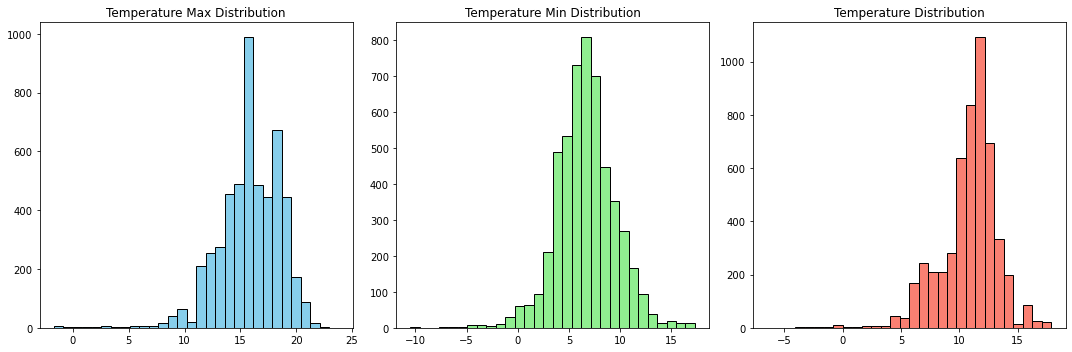

In [40]:
# Temperature distribution plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
#sns.histplot(df['tempmax'], kde=True, bins=30, color='skyblue')
#sns.histplot(df['tempmax'].values, kde=True, bins=30, color='skyblue')
plt.hist(df['tempmax'], bins=30, color='skyblue', edgecolor='black')
plt.title('Temperature Max Distribution')

plt.subplot(1, 3, 2)
#sns.histplot(df['tempmin'], kde=True, bins=30, color='lightgreen')
plt.hist(df['tempmin'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Temperature Min Distribution')

plt.subplot(1, 3, 3)
#sns.histplot(df['temp'], kde=True, bins=30, color='salmon')
plt.hist(df['temp'], bins=30, color='salmon', edgecolor='black')
plt.title('Temperature Distribution')

plt.tight_layout()
plt.show()

C:\Users\maldi\AppData\Local\Temp\ipykernel_20084\373528083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='estatActual', data=df, palette='viridis')


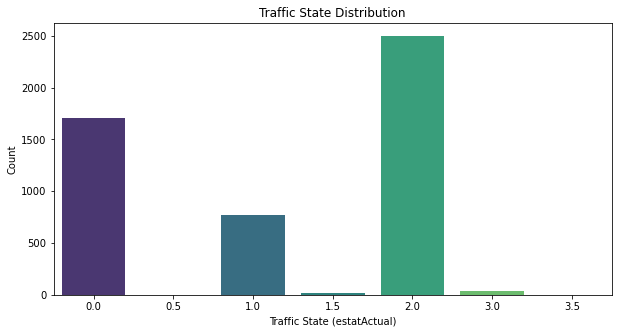

In [41]:
# Traffic state distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='estatActual', data=df, palette='viridis')
plt.title('Traffic State Distribution')
plt.xlabel('Traffic State (estatActual)')
plt.ylabel('Count')
plt.show()

### Dataset Overview

The dataset has 5183 rows and 85 columns.

There are a mix of numerical, categorical, and datetime columns.

### Missing Values

Columns like preciptype, solarradiation, solarenergy, uvindex, estatActual, estatPrevist, and Tram_Components have missing values.

preciptype has a significant number of missing values (3526 missing).

### Numerical Columns

Key weather-related columns: tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, snow, snowdepth, windgust, windspeed, winddir, pressure, cloudcover, visibility, solarradiation, solarenergy, uvindex.
Traffic-related columns: IMPORT_FRACCIO, IMPORT_MAXIM, mid_latitude, mid_longitude, estatActual, estatPrevist, Tram_Components.

### Categorical Columns

Key columns: datetime, preciptype, conditions, description, icon, stations, source, resolvedAddress, address, timezone, date, TIPUS_TRAM, ADREÇA, RGB, COLOR, TYPE, CODI_HORARI, DESCRIPTION_HORARI, DESC_CURTA_HORARI, CODI_TARIFA, DESCRIPTION_TARIFA, DESC_CURTA_TARIFA, Descripció.

### Exploratory Data Analysis (EDA) Results

### Correlation Heatmap

The correlation heatmap reveals relationships between numerical variables. Strong correlations are evident among temperature-related variables (tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike).

There are also notable correlations among wind-related variables (windgust, windspeed).

### Temperature Distribution

Temperature Max: Distribution is slightly right-skewed with a peak around 15-20°C.

Temperature Min: Similar right-skewed distribution with a peak around 5-10°C.

Temperature: Normal distribution centered around 10-15°C.

### Traffic State Distribution

The estatActual variable (traffic state) shows a higher frequency of traffic states around 0 and 1, indicating varying traffic conditions.

### Handling missing values

In [42]:
# Identify missing values
missing_values_summary = df.isnull().sum().sort_values(ascending=False)
missing_values_summary = missing_values_summary[missing_values_summary > 0]

missing_values_summary

Tram_Components    146
estatPrevist       146
estatActual        146
solarradiation      71
uvindex             71
solarenergy         71
dtype: int64

Missing Values Summary

severerisk: 5112 missing

preciptype: 3526 missing

Tram_Components: 146 missing

estatPrevist: 146 missing

estatActual: 146 missing

solarradiation: 71 missing

uvindex: 71 missing

solarenergy: 71 missing

### Handling Missing Values

severerisk: Since it has a significant number of missing values, we can consider removing this column if it's not critical.

preciptype: Given the high number of missing values, we can create a new category "Unknown" for missing entries.

Tram_Components, estatPrevist, estatActual: These columns have fewer missing values and can be imputed using the mean or median.

solarradiation, uvindex, solarenergy: These columns have a small number of missing values and can be imputed using the mean.

In [43]:
# Tram_Components, estatPrevist, estatActual: fill with median
df['Tram_Components'].fillna(df['Tram_Components'].median(), inplace=True)
df['estatPrevist'].fillna(df['estatPrevist'].median(), inplace=True)
df['estatActual'].fillna(df['estatActual'].median(), inplace=True)

In [44]:
# solarradiation, uvindex, solarenergy: fill with mean
df['solarradiation'].fillna(df['solarradiation'].mean(), inplace=True)
df['uvindex'].fillna(df['uvindex'].mean(), inplace=True)
df['solarenergy'].fillna(df['solarenergy'].mean(), inplace=True)

In [45]:
# Verify that there are no more missing values
missing_values_after = df.isnull().sum().sum()

missing_values_after

0

### Feature Engineering

Datetime Features: Extract features like hour, day of the week, and month from the datetime column.

Weather Features: Utilize existing weather-related columns.

Location Features: Use latitude and longitude information.

Encoding Categorical Variables: Convert categorical variables to numerical format.
Scaling Numerical Features: Standardize numerical features to have zero mean and unit variance.

In [46]:
# Convert datetime to pandas datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Extracting features from datetime
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month

In [47]:
# Dropping original datetime column as we have extracted useful features from it
df.drop(columns=['datetime'], inplace=True)

In [48]:
# Verify new features
df[['hour', 'day_of_week', 'month']].head()

,hour,day_of_week,month
0,0,1,1
1,0,1,1
2,0,1,1
3,0,1,1
4,0,1,1


### Feature importance

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.metrics import mean_squared_error

In [54]:
X = df.drop(columns=['PLACES']) #all the columns except the target ones
y = df['PLACES'] #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# asdd the column 'target' at the dataset X_train
X_train['target'] = y_train

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Numeric feature preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Encoding categorical variables with TargetEncoder
categorical_transformer = Pipeline(steps=[
    ('target_encoder', TargetEncoder(cols=categorical_features))
])

# Feature preprocessing (numeric and categorical)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [55]:
# train with RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(preprocessor.fit_transform(X_train, y_train), y_train)

RandomForestRegressor()

In [56]:
# Get feature importances from the RandomForestRegressor model
feature_importances = model.feature_importances_

# Get indexes of features sorted by importance
sorted_indices = feature_importances.argsort()[::-1]

print("Features selected in order of importance with the associated score:")
for index in sorted_indices:
    print(f"{X.columns[index]} - {feature_importances[index]}")

Features selected in order of importance with the associated score:
DESC_CURTA_TARIFA - 0.3291867349471662
TIPUS_FRACCIO - 0.32669104041349817
CODI_TARIFA - 0.31581086092862254
Tram_Components - 0.007809326911134393
Unnamed: 0 - 0.002718480807474614
timezone - 0.00270828127961449
icon - 0.0025782008741605878
moonphase - 0.002109336415943131
stations - 0.0019987747024881822
ID_HORARIO - 0.0019235095096896337
TIPUS_TRAM - 0.0014340691856797505
resolvedAddress - 0.0012149174383182474
COLOR - 0.000433171344468692
longitude - 0.00042301757306049547
tzoffset - 0.00033954179929280914
sunsetEpoch - 0.0003174867041685817
ADREÇA - 0.00028777557126395193
source - 0.0002771180388791433
LATITUD_F - 0.0001771308870002832
Latitud - 0.00016451017746525187
LONGITUD_F - 0.00016129930881143782
latitude - 0.0001497764051855634
address - 0.000132339129136996
estatActual - 0.00012911534491616186
ID_TARIFA - 0.00012414741711543672
description - 0.00011495213948411774
estatPrevist - 0.00011053686210914319
UTM

### Let's proceed with encoding and scaling

In [57]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [58]:
# Define features and target variable
#features = df.drop(columns=['PLACES'])
features = df[['DESC_CURTA_TARIFA', 'TIPUS_FRACCIO', 'Tram_Components', 'icon', #'CODI_TARIFA'
               'moonphase', 'resolvedAddress']] #'timezone', 'stations', 'TIPUS_TRAM', 'ID_HORARIO'

target = df['PLACES']

In [59]:
features

,DESC_CURTA_TARIFA,TIPUS_FRACCIO,Tram_Components,icon,moonphase,resolvedAddress
0,"2,75 E/h <= 2h",1.0,5.0,partly-cloudy-day,0.93,"41.4150674,2.1074824"
1,0 E/h <= 30min,0.0,12.0,partly-cloudy-day,0.93,"41.399373,2.1215125"
2,"2,75 E/h <= 2h",1.0,6.0,partly-cloudy-day,0.93,"41.3901401,2.112218"
3,"2,75 E/h <= 2h",1.0,2.0,partly-cloudy-day,0.93,"41.3819857,2.1256083"
4,"2,75 E/h <= 2h",1.0,2.0,partly-cloudy-day,0.93,"41.4059829,2.1334046"
...,...,...,...,...,...,...
5178,0 E/h <= 30min,0.0,5.0,partly-cloudy-day,0.04,"41.4499653,2.1995304"
5179,"2,75 E/h <= 2h",1.0,4.0,partly-cloudy-day,0.04,"41.4232198,2.202940152045822"
5180,"2,75 E/h <= 2h",1.0,2.0,partly-cloudy-day,0.04,"41.4149787,2.2138765"
5181,"2,75 E/h <= 2h",1.0,5.0,partly-cloudy-day,0.04,"41.4052285,2.2133522"


In [60]:
# Identify categorical and numerical columns
categorical_cols = features.select_dtypes(include=['object']).columns.tolist()
numerical_cols = features.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [61]:
# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [62]:
# Define the preprocessing and modeling pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [64]:
# Fit the preprocessor on the training data
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

X_train_preprocessed.shape, X_test_preprocessed.shape

((4146, 88), (1037, 88))

The data has been successfully preprocessed and split into training and testing sets. The preprocessed training set has 4146 samples and 4426 features, while the testing set has 1037 samples and 4426 features.

### MODELING

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [66]:
# Define the model
model = RandomForestRegressor(random_state=42)

In [67]:
# Train the model
model.fit(X_train_preprocessed, y_train)

RandomForestRegressor(random_state=42)

In [68]:
# Predict on the test set
y_pred = model.predict(X_test_preprocessed)

In [69]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(0.02633558341369335, 0.05836460945033751, 0.9982267246629551)

### Model Evaluation

The Random Forest Regressor model yielded the following performance metrics:

Mean Absolute Error (MAE): 0.026

Mean Squared Error (MSE): 0.058

R-squared (R²): 0.998

These metrics indicate that the model performs very well, with a high R² value suggesting that it explains a significant portion of the variance in the target variable, PLACES. The low MAE and MSE values indicate that the model's predictions are very close to the actual values.

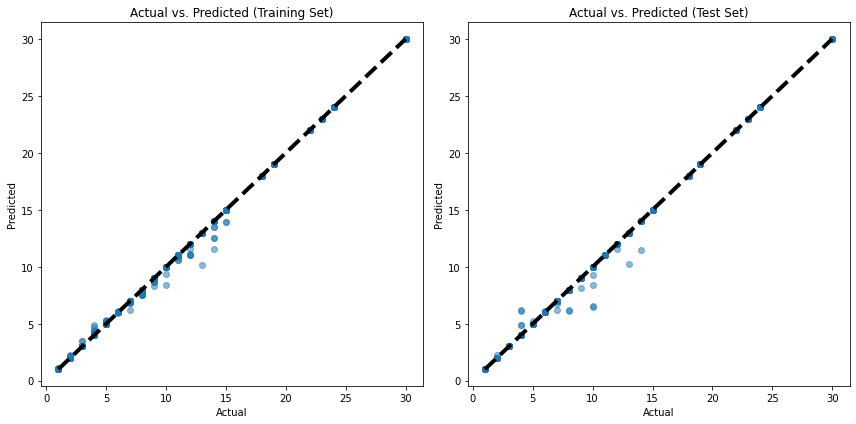

In [70]:
# Predict on the training set
y_train_pred = model.predict(X_train_preprocessed)

# Plot actual vs. predicted values for the training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Training Set)')

# Predict on the test set
y_test_pred = model.predict(X_test_preprocessed)

# Plot actual vs. predicted values for the test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Test Set)')

plt.tight_layout()
plt.show()

### Training Set (Left Plot):

The points are closely aligned with the diagonal line, indicating that the model's predictions are very close to the actual values.
This suggests that the model performs very well on the training data.

### Test Set (Right Plot):

The points are also closely aligned with the diagonal line, though there is a bit more spread compared to the training set.

This indicates that the model's predictions are still quite accurate on the test data, but with slightly more error compared to the training set.

### Conclusion:

The model appears to perform well on both the training and test sets, with a high degree of accuracy and no significant signs of overfitting. The slight increase in error on the test set is expected and normal.